In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Task 3-Step 1: Build and test your method chain(s)

#loaded data
df = pd.read_csv("AirQualityUCI.csv")
df.head()

#Method chaining
df = (df
      .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])
      .dropna()
      .rename(columns={"NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})  
     )


df.head()


,Date,Time,CO(GT),Nonmethane Hydrocarbons,Benzene,Nitrogen Oxides,Nitrogen Dioxide,T
0,2004/3/10,18:00:00,2.6,150.0,11.9,166.0,113.0,13.6
1,2004/3/10,19:00:00,2.0,112.0,9.4,103.0,92.0,13.3
2,2004/3/10,20:00:00,2.2,88.0,9.0,131.0,114.0,11.9
3,2004/3/10,21:00:00,2.2,80.0,9.2,172.0,122.0,11.0
4,2004/3/10,22:00:00,1.6,51.0,6.5,131.0,116.0,11.2


In [33]:
##Task 3-Step 2 : Wrap your method chain(s) in a function


def load_and_process(AirQualityUCI_csv):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv("AirQualityUCI.csv")
          .rename(columns={"NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .dropna()
          .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])
      )

    # Make sure to return the latest dataframe

    return df2 


<AxesSubplot:xlabel='Nitrogen Dioxide', ylabel='Nitrogen Oxides'>

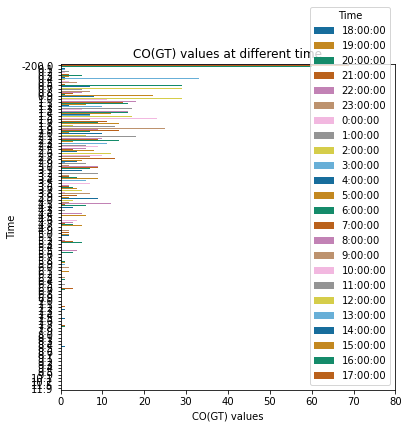

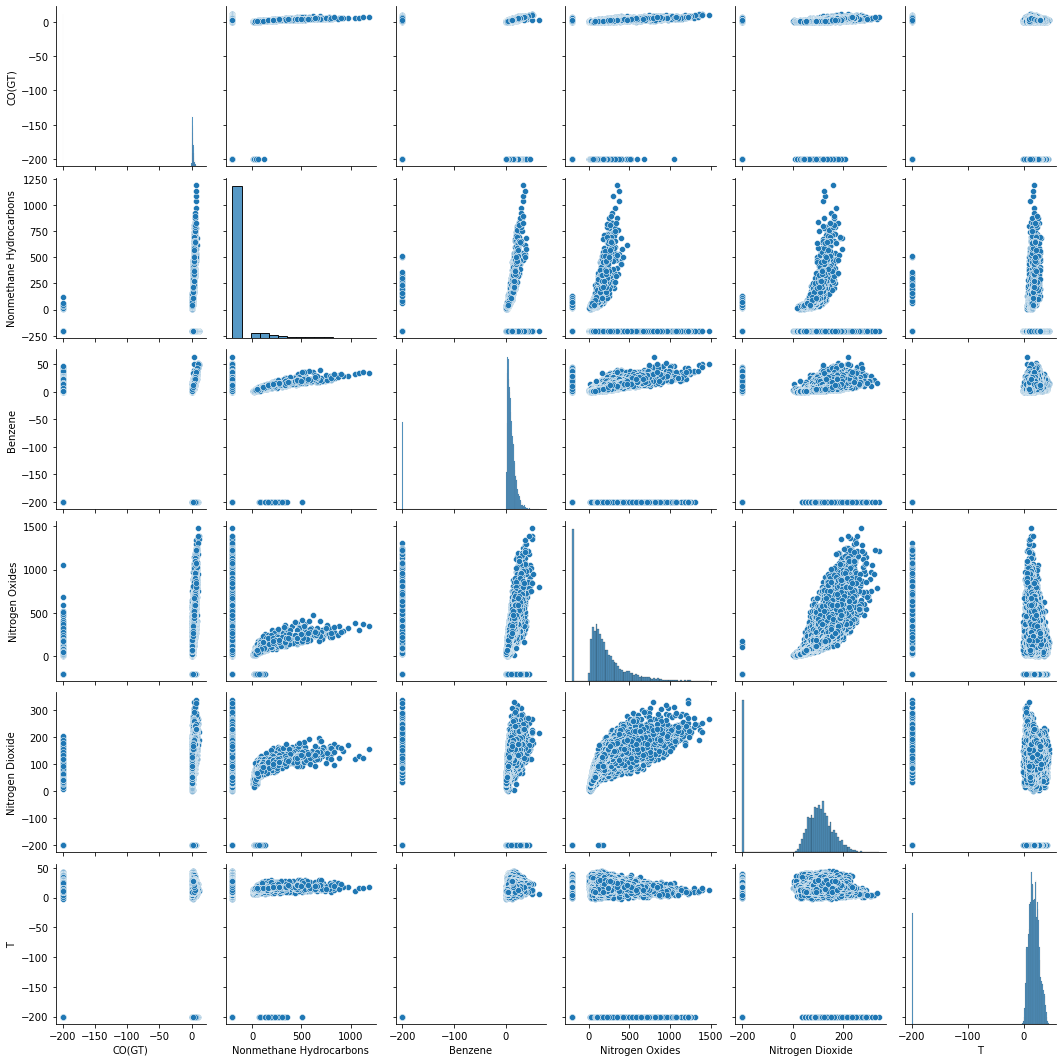

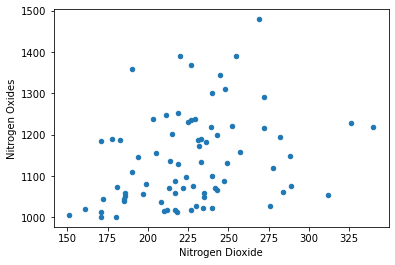

In [38]:
##Task 4 : Conduct an Exploratory Data Analysis (EDA) on your dataset

#Involve at least two columns/features of your dataset:
df_cleaned1= df[df['Nitrogen Oxides']>1000]
df_cleaned2= df[df['CO(GT)']==-200]


#At least three useful visualizations created by you:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

v1 = sns.countplot(y = "CO(GT)", hue = "Time", data=df, palette="colorblind")
v1.set(xlim=(0, 80))
plt.title("CO(GT) values at different time")
plt.xlabel("CO(GT) values")
plt.ylabel("Time")

v2 = sns.pairplot(df)
v2

v3 = df_cleaned.plot(kind='scatter', x='Nitrogen Dioxide', y='Nitrogen Oxides')
v3
#Some notes and commentary to help others see observations you find interesting: